<a href="https://colab.research.google.com/github/mskv99/Blob-Detection/blob/main/Blob_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effective blob detector for Scanning Electron Microscope Images

Clone the repository

In [1]:
!git clone https://github.com/mskv99/Blob-Detection.git

Cloning into 'Blob-Detection'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 32 (delta 11), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 6.18 MiB | 19.19 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [5]:
%cd /content/Blob-Detection/

/content/Blob-Detection


Import libraries

In [12]:
import numpy as np

from google.colab.patches import cv2_imshow

import cv2
from kernel_detection import matrix_summ, kernel_detector


Define the input/output path for the image and a `SAVE_RESULT` flag, depending on whether you want to save result after removing blobs or not:

In [15]:
INPUT_IMAGE_PATH = '/content/Blob-Detection/examples/orig_1.tif'

SAVE_RESULT = True

OUTPUT_IMAGE_PATH = '/content/removed_blobs_sample.jpg'

Read and preprocess image:

* converting to grayscale format;
* apply bilateral filter
* binarize the image
* make an BGR copy of the image



Image size:(1024, 1024)


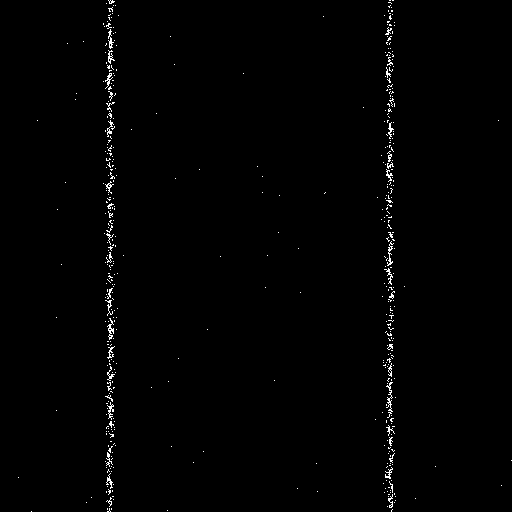

In [23]:
sample = cv2.imread(INPUT_IMAGE_PATH)

sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
sample = cv2.bilateralFilter(sample, 0, 10, 10)

thresh = 190
maxValue = 255
ret, img = cv2.threshold(sample, thresh, maxValue, cv2.THRESH_BINARY)

print(f'Image size:{img.shape}')

height = img.shape[0]
width = img.shape[1]
blobs_list = []

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
image_copy = color.copy()

cv2_imshow(img[:512, :512]) #thresholding operation

Remove blobs from image with 7x7 filter:

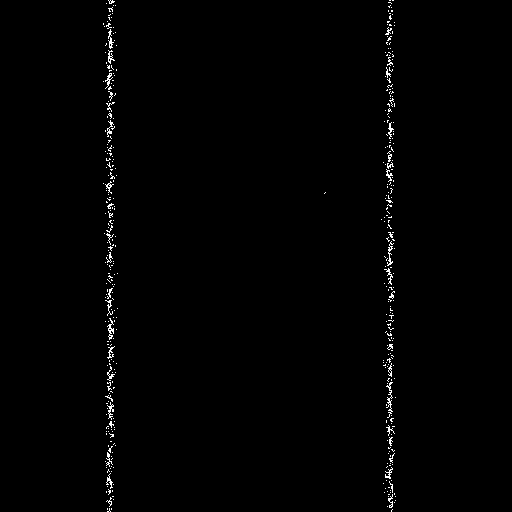

In [24]:
kernel_detector(kernel_size = 7, image_height = height, image_width = width, img=img, img_copy= image_copy, blobs_list=blobs_list)
cv2_imshow(image_copy[:512, :512]) #"Removing blobs with 7x7 filter",

Remove blobs with 13x13 filter

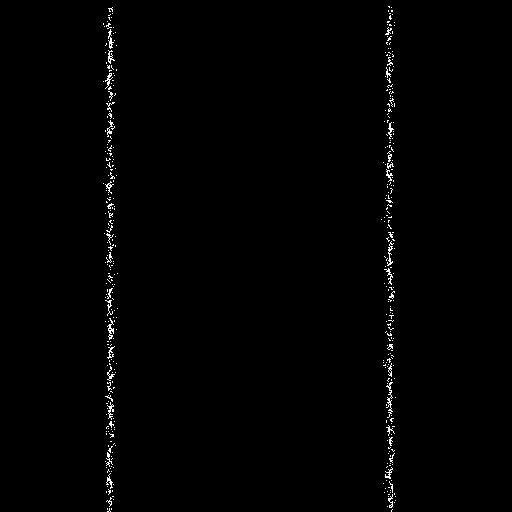

In [25]:
kernel_detector(kernel_size = 13, image_height = height, image_width = width, img=img, img_copy = image_copy, blobs_list= blobs_list)
cv2_imshow(image_copy[:512, :512])

Save the binarized image with removed blobs:

In [16]:
if SAVE_RESULT:
    cv2.imwrite(OUTPUT_IMAGE_PATH, image_copy)

Highlight the detected blobs and observe the number of detected blobs:

Количество выбросов: 500


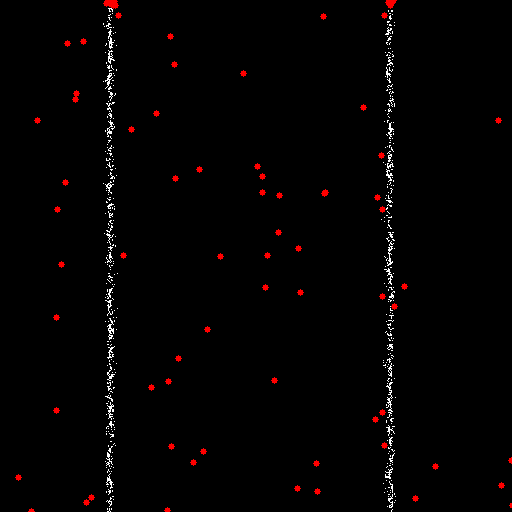

In [26]:
array = np.array(blobs_list, dtype = int)
res = array.reshape(int(len(blobs_list)/2), 2)
print("Количество выбросов:",res.shape[0])

for k in range(int((res.size)/2)):
    center = (res[k][0],res[k][1])
    image_copy = cv2.circle(image_copy, center, 3,(0,0,255),-1)

cv2_imshow(image_copy[:512, :512])